In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from xgboost import XGBClassifier

sns.set()

import warnings
warnings.filterwarnings("ignore")

In [10]:
train_path = "/content/titanic_train.csv"
train_df = pd.read_csv(train_path)

test_path = "/content/titanic_test.csv"
test_df = pd.read_csv(test_path)

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
shape_train = train_df.shape
shape_test = test_df.shape

len_train = len(train_df)
len_test = len(test_df)
len_total = len_train + len_test

print(f"Train Shape: {shape_train}")
print(f"Test Shape: {shape_test}")
print(f"Train - Test %: {len_train/len_total*100:.2f}% - {len_test/len_total*100:.2f}%")

Train Shape: (891, 12)
Test Shape: (418, 11)
Train - Test %: 68.07% - 31.93%


In [14]:
to_drop = ["Name", "Ticket"]

train_df.drop(columns= to_drop, inplace= True)
test_df.drop(columns= to_drop, inplace= True)

shape_train = train_df.shape
shape_test = test_df.shape
print(f"Train Shape: {shape_train}")
print(f"Test Shape: {shape_test}")

Train Shape: (891, 10)
Test Shape: (418, 9)


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [16]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Cabin        91 non-null     object 
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [17]:
train_miss_prob = round(train_df.isna().mean()*100)
train_miss = train_df.isna().sum()

train_miss_df = pd.DataFrame(
    {
        "Total Missing": train_miss,
        "Persentase Missing": train_miss_prob,
    }
)

train_miss_df["Persentase Missing"] = train_miss_df["Persentase Missing"].astype(int)

train_miss_df.T

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Total Missing,0,0,0,0,177,0,0,0,687,2
Persentase Missing,0,0,0,0,20,0,0,0,77,0


In [18]:
test_miss_prob = round(test_df.isna().mean()*100)
test_miss = test_df.isna().sum()

test_miss_df = pd.DataFrame(
    {
        "Total Missing": test_miss,
        "Persentase Missing": test_miss_prob,
    }
)

test_miss_df["Persentase Missing"] = test_miss_df["Persentase Missing"].astype(int)

test_miss_df.T

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Total Missing,0,0,0,86,0,0,1,327,0
Persentase Missing,0,0,0,21,0,0,0,78,0


In [19]:
train_df.drop(columns= "Cabin", axis= 1, inplace= True)
test_df.drop(columns= "Cabin", axis= 1, inplace= True)

print(f"Train-test shape: {train_df.shape}-{test_df.shape}")

Train-test shape: (891, 9)-(418, 8)


In [20]:
train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])

test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].mean())

In [21]:
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].mean())
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].mean())

In [22]:
def plot_graph(
    df,        # DataFrame
    col_list,  # List kolom
    d_type,    # Datatype
    plot_mode, # "hue_target" or "none"
):

    plt.figure(figsize= (12, 10))
    for i, col in enumerate(col_list):
        plt.subplot(4, 2, i+1)

        # Hue dengan label
        if plot_mode == "hue_target":
            if d_type != "object":
                sns.histplot(
                    data= df,
                    x= col,
                    kde= True,
                    hue= "Survived"
                )
            else:
                sns.countplot(
                    data= df,
                    x= col,
                    hue= "Survived"
                )

        # Bukan hue dengan label
        else:
            if d_type != "object":
                sns.histplot(
                    data= df,
                    x= col,
                    kde= True,
                )
            else:
                sns.countplot(
                    data= df,
                    x= col,
                )

        plt.title(f"distribusi {col}", fontweight= "bold")
    plt.tight_layout()

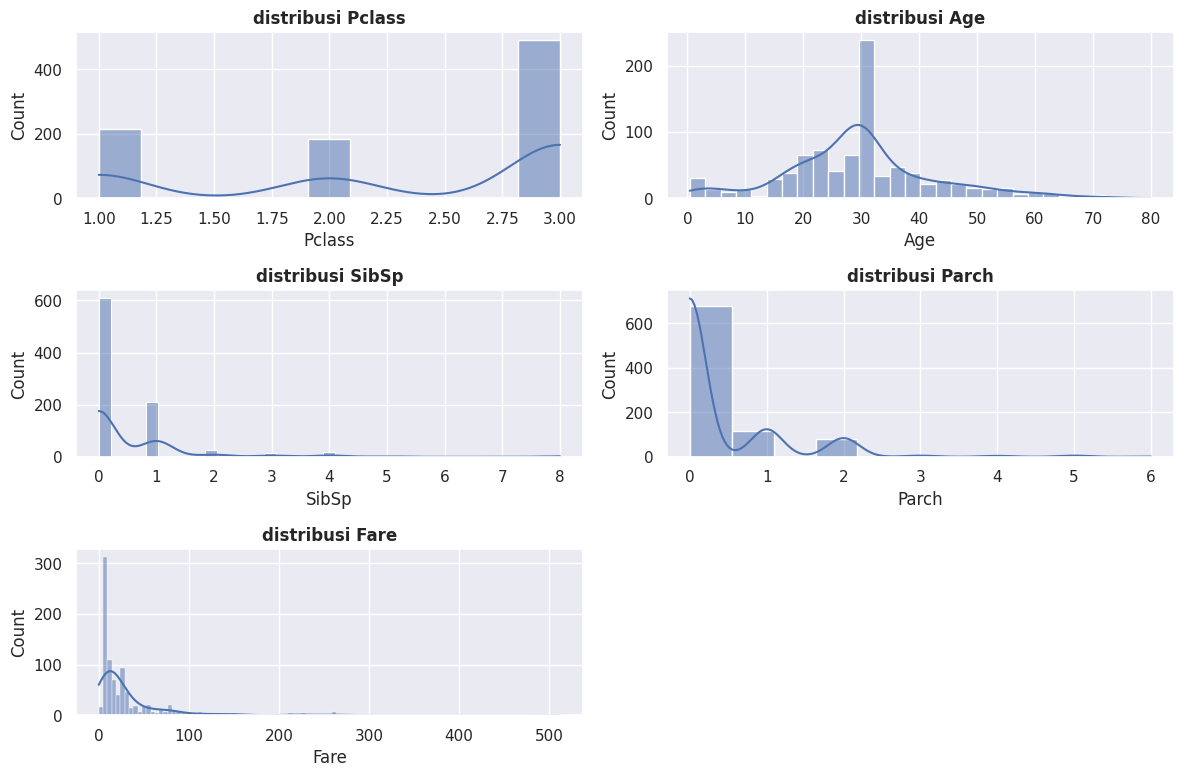

In [23]:

numeric_col_train = [col for col in train_df if (train_df[col].dtype != "object") & (col != "PassengerId") & (col != "Survived")]

plot_graph(train_df, numeric_col_train, "numeric", "none")

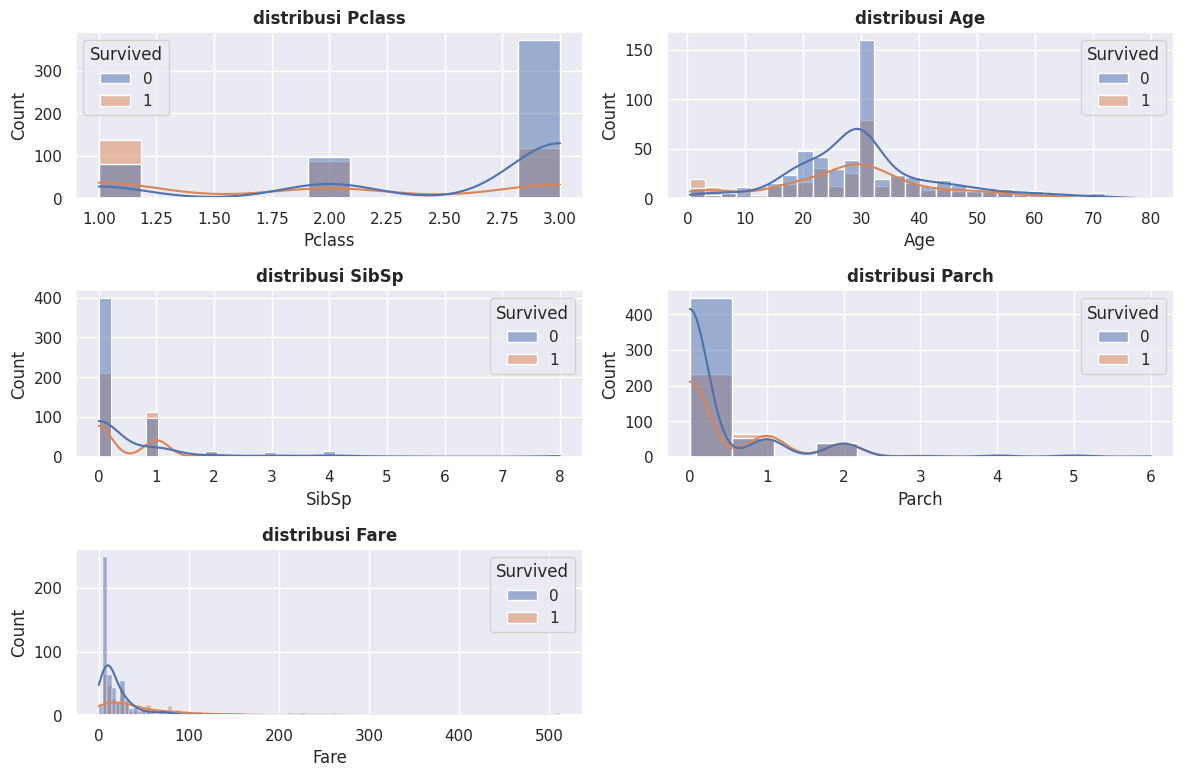

In [24]:
numeric_col_train = [col for col in train_df if (train_df[col].dtype != "object") & (col != "PassengerId") & (col != "Survived")]

plot_graph(train_df, numeric_col_train, "numeric", "hue_target")

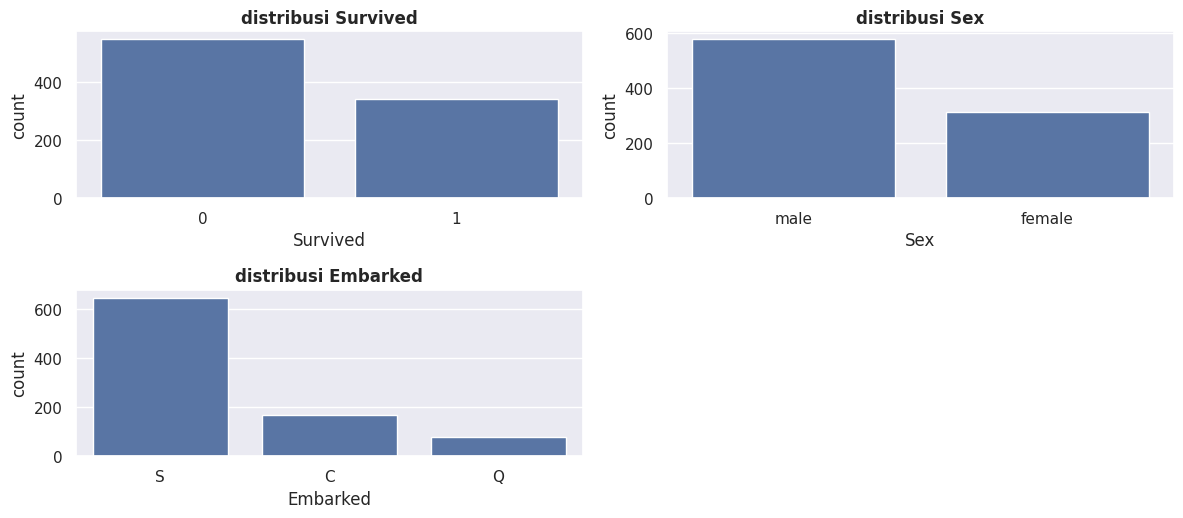

In [25]:
object_col_train = [col for col in train_df if (train_df[col].dtype == "object") | (col == "Survived")]

plot_graph(train_df, object_col_train, "object", "none")

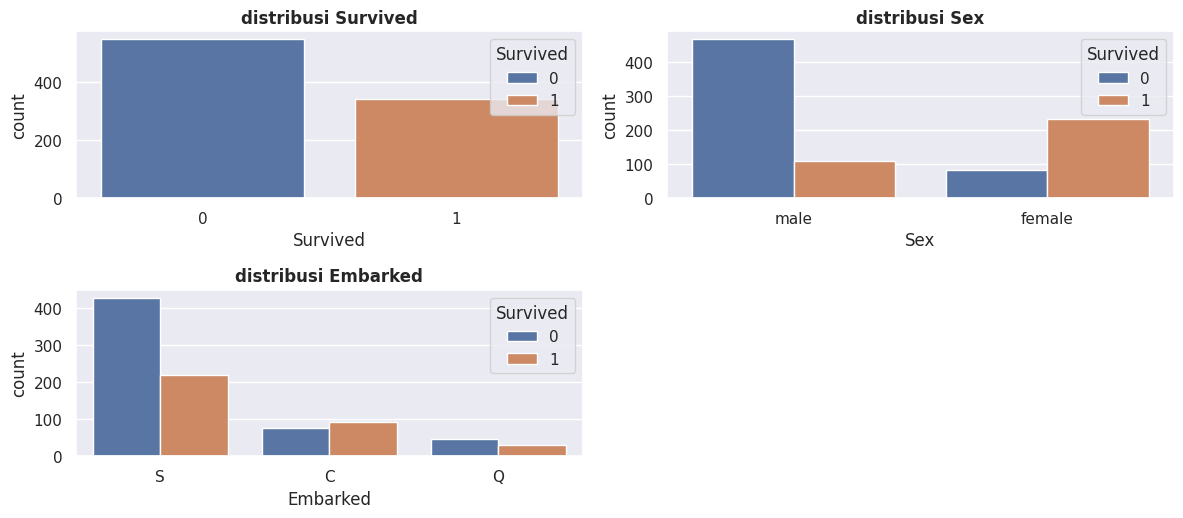

In [26]:
object_col_train = [col for col in train_df if (train_df[col].dtype == "object") | (col == "Survived")]

plot_graph(train_df, object_col_train, "object", "hue_target")

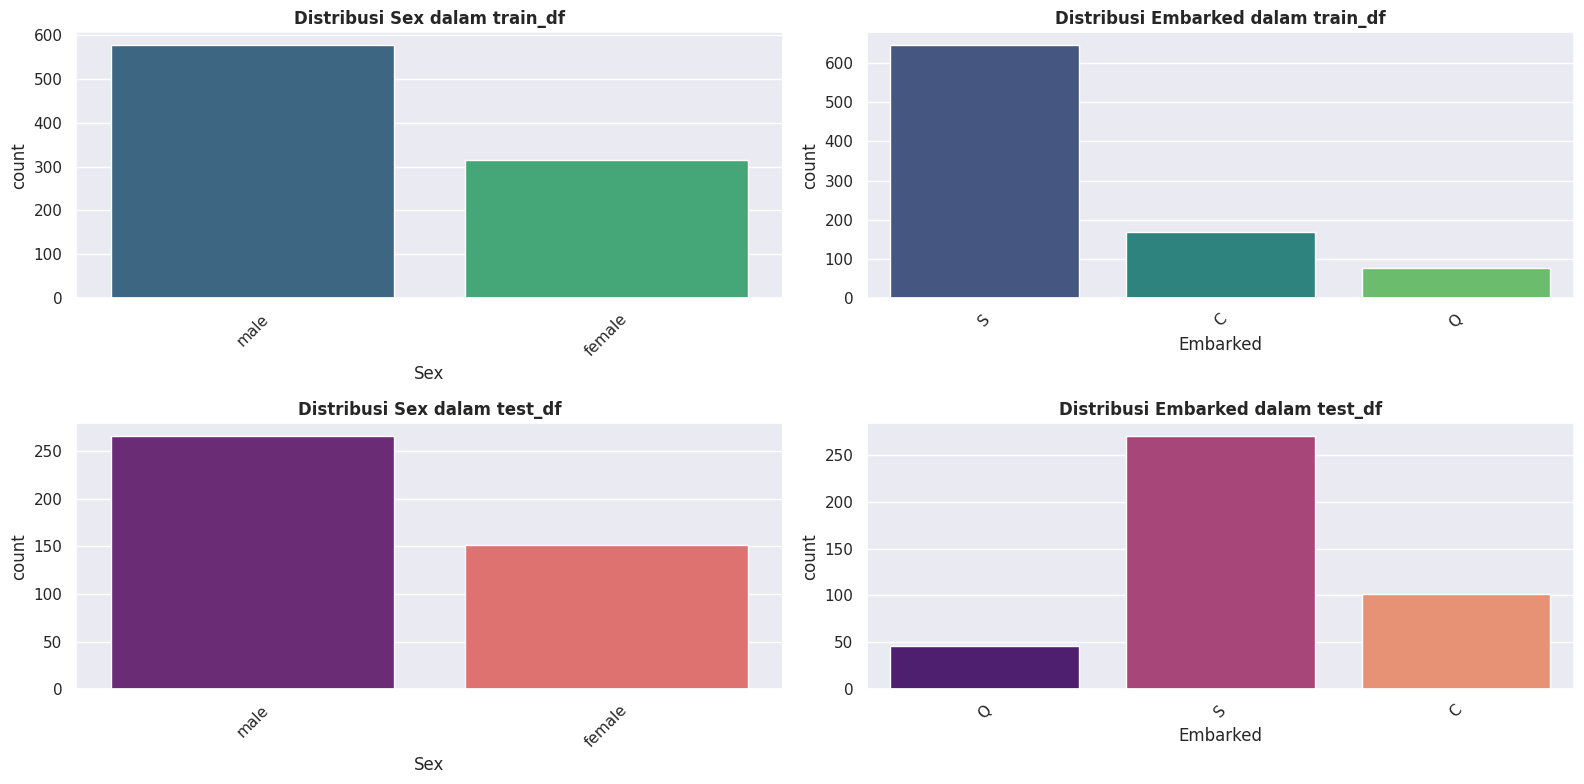

In [27]:
object_col_train = [col for col in train_df.columns if train_df[col].dtype == "object"]

plt.figure(figsize= (16, 8))
for i, col in enumerate(object_col_train):
    plt.subplot(2, len(object_col_train), i+1)
    sns.countplot(data= train_df, x= col, palette= "viridis")
    plt.title(f"Distribusi {col} dalam train_df", fontweight= "bold")
    plt.xticks(rotation= 45)
    plt.subplot(2, len(object_col_train), len(object_col_train) + i + 1)
    sns.countplot(data= test_df, x= col, palette= "magma")
    plt.title(f"Distribusi {col} dalam test_df", fontweight= "bold")
    plt.xticks(rotation= 45)

plt.tight_layout()
plt.show()

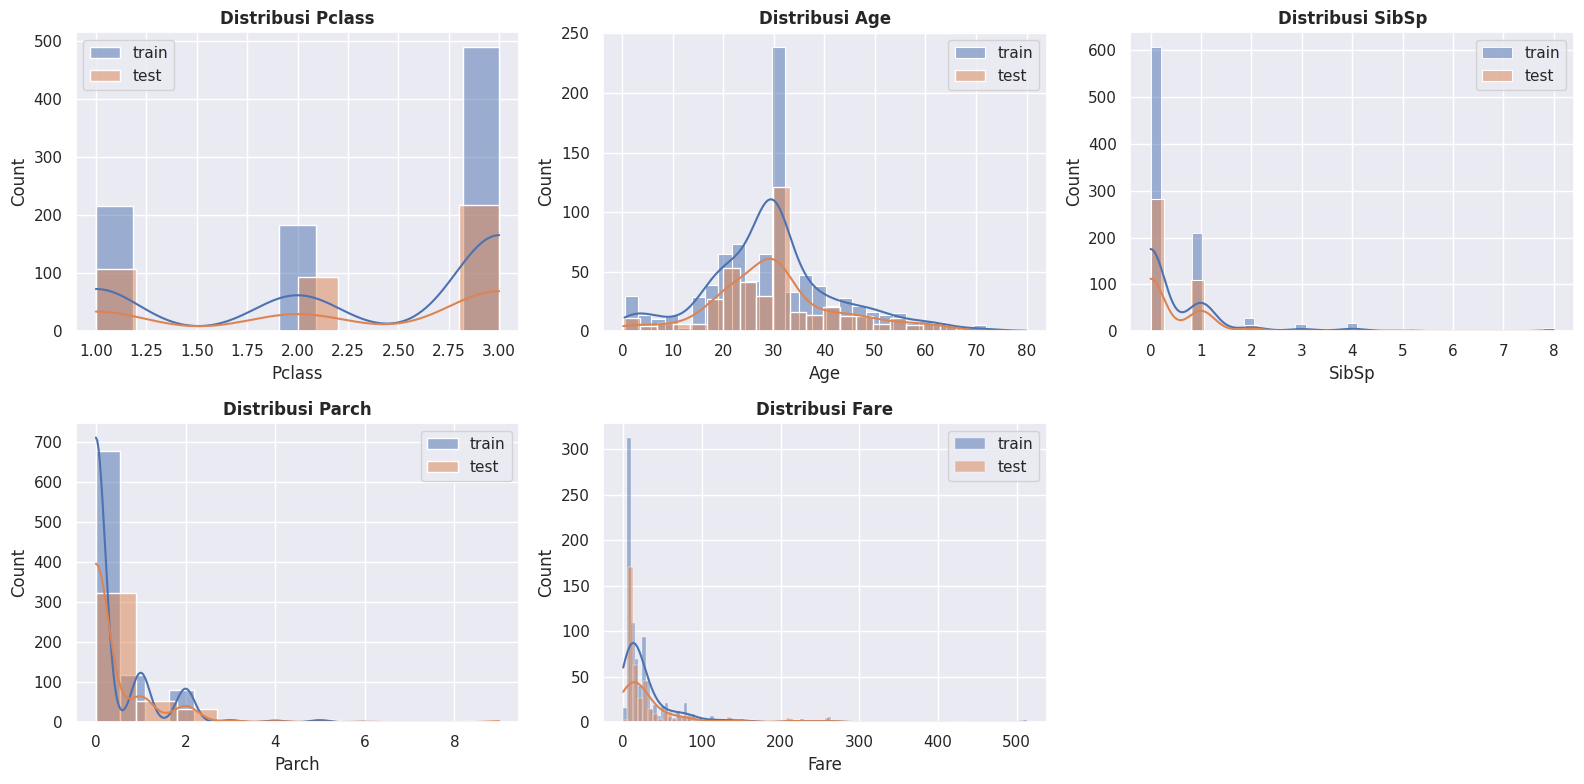

In [28]:
numeric_col_train = [col for col in train_df.columns if (train_df[col].dtype != "object") & (col != "PassengerId") & (col != "Survived")]

plt.figure(figsize= (16, 8))
for i, col in enumerate(numeric_col_train):
    plt.subplot(2, 3, i+1)
    sns.histplot(data= train_df, x= col, palette= "viridis", label= "train", kde= True)
    sns.histplot(data= test_df, x= col, palette= "magma", label= "test", kde= True)
    plt.legend()
    plt.title(f"Distribusi {col}", fontweight= "bold")
plt.tight_layout()
plt.show()

In [29]:
train_df['total_relative'] = train_df['SibSp'] + train_df['Parch']
test_df['total_relative'] = test_df['SibSp'] + test_df['Parch']

print(f'train_df - test_df shape: {train_df.shape} - {test_df.shape}.')

train_df - test_df shape: (891, 10) - (418, 9).


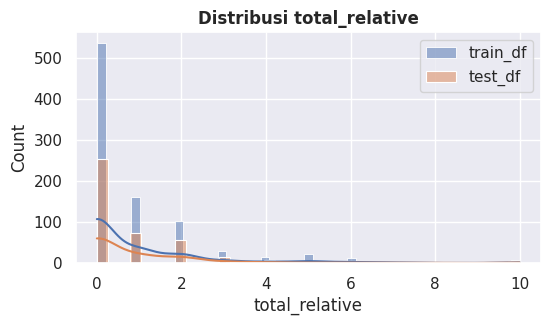

In [30]:
plt.figure(figsize= (6, 3))

sns.histplot(data= train_df, x= "total_relative", kde= True, label= "train_df")
sns.histplot(data= test_df, x= "total_relative", kde= True, label= "test_df")

plt.legend()
plt.title("Distribusi total_relative", fontweight= "bold")
plt.show()

In [31]:
encode_col = [col for col in train_df if train_df[col].dtype == "object"]

encoded_train = pd.get_dummies(train_df[encode_col], drop_first= True)
train_df = pd.concat([encoded_train, train_df], axis= 1)

encoded_test = pd.get_dummies(test_df[encode_col], drop_first= True)
test_df = pd.concat([encoded_test, test_df], axis= 1)

In [32]:
train_df.drop(columns= encode_col, axis= 1, inplace= True)
test_df.drop(columns= encode_col, axis= 1, inplace= True)

In [33]:
X = np.array(train_df.drop(columns= ["PassengerId", "Survived"], axis= 1))
y = np.array(train_df["Survived"])

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state= 42)


In [35]:
X_test = test_df.drop(columns= "PassengerId", axis= 1).values

In [36]:
model = XGBClassifier(
    n_estimators= 70,
    max_depth= 10,
    learning_rate= 0.1,
    subsample= 0.9,
    colsample_bytree= 0.9,
)

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [37]:
report = classification_report(y_val, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [38]:
X_test_pred = model.predict(X_test)
test_df["Survived"] = X_test_pred

In [39]:
submit = test_df[["PassengerId", "Survived"]]
submit["PassengerId"] = submit["PassengerId"].astype(int)
submit.to_csv("submission.csv", index= False)

In [41]:
print(pd.read_csv('/content/submission.csv').head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
